z = 0.50, Quasar Luminosity = 3.69402e-07
z = 1.00, Quasar Luminosity = 8.18320e-08
z = 1.50, Quasar Luminosity = 4.19853e-08
z = 2.00, Quasar Luminosity = 2.09932e-08
z = 2.50, Quasar Luminosity = 8.96575e-09
z = 3.00, Quasar Luminosity = 3.53570e-09
z = 3.50, Quasar Luminosity = 1.39077e-09
z = 4.00, Quasar Luminosity = 5.64714e-10
z = 4.50, Quasar Luminosity = 2.38283e-10
z = 5.00, Quasar Luminosity = 1.04253e-10


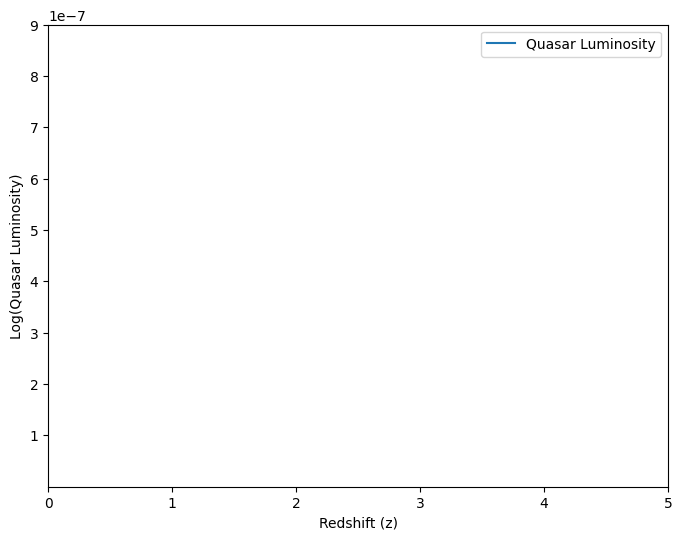

In [14]:
#ALL VALUES (EXCLUDING KNOWN PHYSICAL CONSTANTS) WERE RETRIEVED DIRECTLY OR INDIRECTLY FROM OM10
#LINK: https://arxiv.org/pdf/1001.2037.pdf

import math
import numpy as np
from astropy.cosmology import FlatLambdaCDM, Planck18
import matplotlib.pyplot as plt

# Class to describe quasars as sources
class Quasar:
    def __init__(self):
        # Constants for quasars - all given values used to reproduce the luminosity function
        self.zeta = 2.98
        self.xi = 4.08
        self.zstar = 1.60

        # Create an array of redshifts from 0.5 to 5.0
        self.z = np.arange(0.5, 5.5, 0.5)

        # Calculate some intermediate values
        self.exp_zeta_z = np.exp(self.zeta * self.z)
        self.exp_xi_zstar = np.exp(self.xi * self.zstar)
        self.exp_xi_z = np.exp(self.xi * self.z)

        self.fz = (self.exp_zeta_z * (1 + self.exp_xi_zstar)) / \
        ((np.sqrt(self.exp_xi_z)) + np.sqrt(self.exp_xi_zstar))**2

        # Create a cosmology instance using Planck18
        self.cosmo = Planck18.clone(H0=68.11, Om0=0.3)

        # Calculate luminosity distance
        self.luminosity_distance = self.cosmo.luminosity_distance(self.z)

        # Calculate absolute and apparent magnitudes - both equations provided
        self.abs_mag = (-20.90) + 5 * np.log10(self.luminosity_distance.value) - 2.5 * np.log10(self.fz) 
        self.app_mag = -5 * np.log10(self.luminosity_distance.value) - self.abs_mag

        # Constants for luminosity function
        self.alpha = -3.31 #bright end of the slope (when z < 3) (constant given)
        self.beta = -1.45 #faint end of the slope (constant given)
        self.phi = 5.35e-6
        self.threshold_z = 3.0 #redshift threshold for changing the value of alpha

    def calculate_lum(self):
        quasar_lum_list = []
        for i in range(len(self.z)):
            alpha1 = self.alpha  # Use the current value of alpha
            if self.z[i] > self.threshold_z:
                # Update alpha when z reaches the threshold
                alpha1 = -2.58  # Set a new value for alpha (when z > 3)
            beta1 = alpha1 + 10**(0.4 * (self.beta + 1) * (self.app_mag[i] - self.abs_mag[i]))
            quasar_lum = self.phi / (alpha1 + beta1)
            quasar_lum_list.append(quasar_lum)
    
        # Return the quasar luminosity
        return quasar_lum_list

    def print_quasar_lum(self):
        quasar_lum_list = self.calculate_lum()
        for i in range(len(self.z)):
            print(f"z = {self.z[i]:.2f}, Quasar Luminosity = {quasar_lum_list[i]:.5e}")

    def plot_quasar_lum(self):
        quasar_lum_list = self.calculate_lum()

        # Apply logarithmic transformation to the data
        log_quasar_lum = np.log10(quasar_lum_list)

        # Create a plot
        plt.figure(figsize=(8, 6))
        plt.plot(self.z, log_quasar_lum, label="Quasar Luminosity")

        # Set custom axis limits for the x and y axes
        plt.xlim(0.0, 5.0)
        plt.ylim(1e-10, 9e-7)

        # Add labels and legend
        plt.xlabel("Redshift (z)")
        plt.ylabel("Log(Quasar Luminosity)")
        plt.legend()

        # Show plot
        plt.show()

# Instantiate the Quasar class
quasars = Quasar()

# Print quasar luminosities
quasars.print_quasar_lum()

# Plot quasar luminosities
quasars.plot_quasar_lum()
